In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from statsmodels.discrete.discrete_model import Logit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
import scikitplot as skplt

In [ ]:
pip install scikit-plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/sample_data_copy.csv")

In [ ]:
data.shape

(27420, 91)

In [ ]:
data.describe()

,ARV17_MINUS_ARV16,BKRPT_RCV_SCORE_VALUE,CUS02_V2,CUS07_REV120_V1,DEM05,RESPONSE_FLAG,SCR02,SCR16,SEQNUM,SMARTV40_AAL01,SMARTV40_AAL18,SMARTV40_AAL19,SMARTV40_AAL24,SMARTV40_AAL25,SMARTV40_AAL27,SMARTV40_AAL60,SMARTV40_AAL61,SMARTV40_AAL63,SMARTV40_AAL66,SMARTV40_AAU13,SMARTV40_ABK01,SMARTV40_ABK05,SMARTV40_ABK18,SMARTV40_ABK19,SMARTV40_ABK21,SMARTV40_ABK22,SMARTV40_ABK23,SMARTV40_ABK33,SMARTV40_ABK35,SMARTV40_AHD11,SMARTV40_AHD31,SMARTV40_AHI22,SMARTV40_AHI46,SMARTV40_AHI90,SMARTV40_AIN17,SMARTV40_AIQ01,SMARTV40_AIQ02,SMARTV40_AIQ04,SMARTV40_AIQ05,SMARTV40_AIQ07,SMARTV40_ALN03,SMARTV40_ALN09,SMARTV40_ALN12,SMARTV40_ALN13,SMARTV40_ALN14,SMARTV40_AMG13,SMARTV40_AMG14,SMARTV40_AMG41,SMARTV40_AMG46,SMARTV40_APR01,SMARTV40_APR04,SMARTV40_APR24,SMARTV40_APR30,SMARTV40_APR35,SMARTV40_APR45,SMARTV40_ART02,SMARTV40_ART07,SMARTV40_ART17,SMARTV40_ART18,SMARTV40_ART23,SMARTV40_ART24,SMARTV40_ART33,SMARTV40_ARV01,SMARTV40_ARV03,SMARTV40_ARV05,SMARTV40_ARV15,SMARTV40_ARV16,SMARTV40_ARV17,SMARTV40_ARV18,SMARTV40_ARV22,SMARTV40_ARV23,SMARTV40_ARV31,SMARTV40_ARV32,SMARTV40_ARV34,SMARTV40_ASL01,SMARTV40_ASL09,SMARTV40_ASL14,SMARTV40_ASL37,SMARTV40_CMG04,SMARTV40_CMG05
count,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,2.742000e+04,27420.000000,2.742000e+04,2.742000e+04,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,2.742000e+04,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,2.742000e+04,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,2.742000e+04,27420.000000,27420.000000,2.742000e+04,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,27420.000000,3815.000000,624.000000
mean,9400.773924,250.624143,0.440007,0.224398,10.117907,0.166667,802.721772,618.852407,1.810481e+06,26.713457,1.731833e+05,2.042893e+05,193.801860,5.523559,70.996681,2598.128264,13.571736,8.495259,4.480525,30.703209,9.579358,6.480635,85.139096,10572.213640,100.971444,154.601058,15.347119,6.150729,0.935558,0.226659,982.808643,0.371991,2.253756,0.666484,5.411859e+04,2.097739,1.833333,1.684537,1.673596,1.049380,0.447629,7.592005e+03,32.228848,16.878702,144.729468,36.927972,758.995295,4.034136,8.903909e+04,0.159701,0.134391,2.069628e+03,5.890810,0.073632,1.076805,2.557877,2.445295,6814.300547,40.738512,28.570678,145.141721,2.697447,16.276878,14.197885,10.163749,3.604267,29581.703647,38982.477571,78.990518,176.261415,10.548614,133.959482,11.858461,915.385376,1.981291,13081.820058,71.346718,2.113275,3.268152,33.383013
std,9657.697012,150.089336,1.693459,1.079641,10.172504,0.372685,291.709273,56.469943,1.759144e+06,12.904780,1.832316e+05,2.023272e+05,97.986659,5.930053,30.509230,1740.759602,6.471910,4.880648,3.805085,35.960914,4.717097,3.328927,13.357686,6087.793089,13.278321,93.204446,19.151567,3.057779,1.563109,0.884692,9447.343041,1.497091,6.747261,1.209018,6.354012e+04,2.474333,1.954162,1.896202,1.891748,1.621538,1.009452,3.723030e+04,51.973088,35.657703,378.179843,57.834089,1155.739047,6.915895,1.402419e+05,1.022089,0.801358,3.133423e+04,22.473695,2.131447,8.382227,2.869044,2.745824,7028.848463,34.920194,38.458416,177.957836,1.848999,8.839525,8.123235,5.720775,3.084551,13015.852766,20015.732331,13.401750,103.246602,13.990113,91.094183,18.538366,448.993411,4.710997,35097.504622,225.038394,3.583723,1.664954,17.453054
min,-18694.000000,1.000000,0.000000,0.000000,0.000000,0.000000,271.000000,402.000000,3.700000e+01,2.000000,1.863600e+04,1.300000e+04,2.000000,0.00

In [ ]:
data.head()


,ARV17_MINUS_ARV16,BKRPT_RCV_SCORE_VALUE,CUS02_V2,CUS07_REV120_V1,DEM03,DEM05,DEM06,DEM08,ENCRYPTED_PIN,KEYID,RESPONSE_FLAG,SCR02,SCR16,SEGMENT_CODE,SEQNUM,SMARTV40_AAL01,SMARTV40_AAL18,SMARTV40_AAL19,SMARTV40_AAL24,SMARTV40_AAL25,SMARTV40_AAL27,SMARTV40_AAL60,SMARTV40_AAL61,SMARTV40_AAL63,SMARTV40_AAL66,SMARTV40_AAU13,SMARTV40_AAU19,SMARTV40_AAU20,SMARTV40_AAU22,SMARTV40_ABK01,SMARTV40_ABK05,SMARTV40_ABK18,SMARTV40_ABK19,SMARTV40_ABK21,SMARTV40_ABK22,SMARTV40_ABK23,SMARTV40_ABK33,SMARTV40_ABK35,SMARTV40_AHD11,SMARTV40_AHD31,...,SMARTV40_ALN09,SMARTV40_ALN12,SMARTV40_ALN13,SMARTV40_ALN14,SMARTV40_AMG13,SMARTV40_AMG14,SMARTV40_AMG41,SMARTV40_AMG46,SMARTV40_APR01,SMARTV40_APR04,SMARTV40_APR24,SMARTV40_APR30,SMARTV40_APR35,SMARTV40_APR45,SMARTV40_ART02,SMARTV40_ART07,SMARTV40_ART17,SMARTV40_ART18,SMARTV40_ART23,SMARTV40_ART24,SMARTV40_ART33,SMARTV40_ARV01,SMARTV40_ARV03,SMARTV40_ARV05,SMARTV40_ARV15,SMARTV40_ARV16,SMARTV40_ARV17,SMARTV40_ARV18,SMARTV40_ARV22,SMARTV40_ARV23,SMARTV40_ARV31,SMARTV40_ARV32,SMARTV40_ARV34,SMARTV40_ASL01,SMARTV40_ASL09,SMARTV40_ASL14,SMARTV40_ASL37,SMARTV40_CMG04,SMARTV40_CMG05,STATE_CD
0,11108,473,0,0,F,0,Y,D,MOMBY0534428631I4,900426140H520,0,666,645,E,2813147,18,236569,279902,87,5,51,2352,6,3,2,34,5,7,5,7,4,66,6360,82,87,5,4,0,0,0,...,0,0,0,0,53,1410,2,203282,0,0,0,0,0,0,0,0,0,0,43,0,0,9,7,4,3,21492,32600,66,87,5,87,7,553,0,0,0,0,2.0,NaN,CA
1,182,213,0,0,M,0,Y,C,AFFDD1582949478B1,760112220B513,0,635,665,B,2159430,10,34497,35823,79,3,29,1020,6,4,15,3,3,7,4,5,4,99,15067,100,79,10,4,0,0,0,...,1623,32,4,294,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4,4,3,24018,24200,99,79,10,79,10,420,0,0,0,0,NaN,NaN,TX
2,5342,494,0,0,M,9,U,H,MSOWM0475581460D9,117802SPRG460,1,591,692,A,992375,8,31874,65065,61,1,31,1217,7,2,3,58,4,1,4,3,3,85,10460,97,61,5,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2000,33,1,28,1,4,4,4,3,22858,28200,81,61,1,61,1,449,0,0,0,0,NaN,NaN,NY
3,85,1,1,1,M,33,N,E,MOMBY0588401613I0,47346620NT420,1,889,512,A,1958602,26,124274,200134,587,5,188,3248,10,6,2,0,0,0,0,4,3,100,13476,100,292,79,3,0,1,25231,...,2000,7,7,112,134,586,6,28803,0,0,0,0,0,0,0,0,0,0,513,0,1,7,5,3,0,29115,29200,100,587,79,292,79,920,2,0,0,0,6.0,55.0,IN
4,2245,109,0,0,F,11,U,H,RRLZL0548350011H5,641193412T524,1,945,605,B,1648761,32,97048,114047,103,1,48,2324,24,21,2,28,8,7,9,11,10,100,2473,107,63,13,10,2,0,0,...,2220,1,1,124,0,0,0,0,0,0,0,0,0,0,10,10,14160,94,18,615,5,25,23,21,3,24105,26350,91,95,2,95,2,1096,0,0,0,0,NaN,NaN,MO


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27420 entries, 0 to 27419
Data columns (total 91 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ARV17_MINUS_ARV16      27420 non-null  int64  
 1   BKRPT_RCV_SCORE_VALUE  27420 non-null  int64  
 2   CUS02_V2               27420 non-null  int64  
 3   CUS07_REV120_V1        27420 non-null  int64  
 4   DEM03                  27420 non-null  object 
 5   DEM05                  27420 non-null  int64  
 6   DEM06                  27420 non-null  object 
 7   DEM08                  27409 non-null  object 
 8   ENCRYPTED_PIN          27420 non-null  object 
 9   KEYID                  27420 non-null  object 
 10  RESPONSE_FLAG          27420 non-null  int64  
 11  SCR02                  27420 non-null  int64  
 12  SCR16                  27420 non-null  int64  
 13  SEGMENT_CODE           27420 non-null  object 
 14  SEQNUM                 27420 non-null  int64  
 15  SM

In [ ]:
object_columns = data.columns[data.dtypes == 'object']
object_columns

Index(['DEM03', 'DEM06', 'DEM08', 'ENCRYPTED_PIN', 'KEYID', 'SEGMENT_CODE',
       'SMARTV40_AAU19', 'SMARTV40_AAU20', 'SMARTV40_AAU22', 'SMARTV40_ALE21',
       'STATE_CD'],
      dtype='object')

In [ ]:
for i in object_columns:
    print(i, '\n', data[i].value_counts(), '\n')

DEM03 
 M    13685
F    12535
U     1190
B       10
Name: DEM03, dtype: int64 

DEM06 
 U    12245
Y    11200
N     3975
Name: DEM06, dtype: int64 

DEM08 
 E    5499
F    4832
G    3214
D    2947
H    2442
C    1452
I    1383
A    1220
L    1215
B    1169
K    1010
J     993
U      33
Name: DEM08, dtype: int64 

ENCRYPTED_PIN 
 NYWIS0871926873F0    2
NLJUU0058112966C2    2
AJBAO0604953476G3    2
ZTUPY0617213661J5    2
PQVQM0588027090F3    2
                    ..
DFLSO1576933531G6    1
JAARY0652109243A1    1
TYGEU0635341393F3    1
JNHFO0137468736F3    1
FEDTU0909135516G6    1
Name: ENCRYPTED_PIN, Length: 27316, dtype: int64 

KEYID 
 538071234S360    2
200011732B632    2
170481173E524    2
2.21E+224        2
489151440S432    2
                ..
77386334GE420    1
906603753L500    1
9265616WOL200    1
947042412B650    1
274074406C636    1
Name: KEYID, Length: 27310, dtype: int64 

SEGMENT_CODE 
 A    10222
B     6787
E     6119
C     2557
D     1400
F      318
H       17
Name: SEGMENT

In [ ]:
print('Duplicates:', data.duplicated().sum())
data = data.drop_duplicates()
data.shape

Duplicates: 19


(27401, 91)

In [ ]:
print('Missing:', data.isna().sum().sum())

Missing: 50381


In [ ]:
print('Missing:', data.isna().sum().sort_values(ascending=False))

Missing: SMARTV40_CMG05       26779
SMARTV40_CMG04       23591
DEM08                   11
SMARTV40_ABK21           0
SMARTV40_AAL66           0
                     ...  
SMARTV40_APR24           0
SMARTV40_APR30           0
SMARTV40_APR35           0
SMARTV40_APR45           0
ARV17_MINUS_ARV16        0
Length: 91, dtype: int64


In [ ]:
print('Single valued columns: ', data.columns[data.nunique()==1])

Single valued columns:  Index([], dtype='object')


In [ ]:
data = data.drop("SMARTV40_CMG05", axis = 1)
data = data.drop ("SMARTV40_CMG04", axis = 1)
data.shape

(27401, 89)

In [ ]:
data.dropna(inplace = True)
data.shape

(27390, 89)

In [ ]:
data.reset_index(drop=True, inplace=True)
data.tail()

,ARV17_MINUS_ARV16,BKRPT_RCV_SCORE_VALUE,CUS02_V2,CUS07_REV120_V1,DEM03,DEM05,DEM06,DEM08,ENCRYPTED_PIN,KEYID,RESPONSE_FLAG,SCR02,SCR16,SEGMENT_CODE,SEQNUM,SMARTV40_AAL01,SMARTV40_AAL18,SMARTV40_AAL19,SMARTV40_AAL24,SMARTV40_AAL25,SMARTV40_AAL27,SMARTV40_AAL60,SMARTV40_AAL61,SMARTV40_AAL63,SMARTV40_AAL66,SMARTV40_AAU13,SMARTV40_AAU19,SMARTV40_AAU20,SMARTV40_AAU22,SMARTV40_ABK01,SMARTV40_ABK05,SMARTV40_ABK18,SMARTV40_ABK19,SMARTV40_ABK21,SMARTV40_ABK22,SMARTV40_ABK23,SMARTV40_ABK33,SMARTV40_ABK35,SMARTV40_AHD11,SMARTV40_AHD31,...,SMARTV40_ALE21,SMARTV40_ALN03,SMARTV40_ALN09,SMARTV40_ALN12,SMARTV40_ALN13,SMARTV40_ALN14,SMARTV40_AMG13,SMARTV40_AMG14,SMARTV40_AMG41,SMARTV40_AMG46,SMARTV40_APR01,SMARTV40_APR04,SMARTV40_APR24,SMARTV40_APR30,SMARTV40_APR35,SMARTV40_APR45,SMARTV40_ART02,SMARTV40_ART07,SMARTV40_ART17,SMARTV40_ART18,SMARTV40_ART23,SMARTV40_ART24,SMARTV40_ART33,SMARTV40_ARV01,SMARTV40_ARV03,SMARTV40_ARV05,SMARTV40_ARV15,SMARTV40_ARV16,SMARTV40_ARV17,SMARTV40_ARV18,SMARTV40_ARV22,SMARTV40_ARV23,SMARTV40_ARV31,SMARTV40_ARV32,SMARTV40_ARV34,SMARTV40_ASL01,SMARTV40_ASL09,SMARTV40_ASL14,SMARTV40_ASL37,STATE_CD
27385,5410,563,0,0,F,14,Y,I,AJBAO0780348824G5,2264293MCK400,0,584,675,B,2432545,27,299321,419616,298,2,107,4796,10,3,3,2,7,6,7,7,2,87,24650,99,287,7,2,0,0,0,...,0,0,0,0,0,0,24,1015,0,161012,0,0,0,0,0,0,0,0,1750,0,8,0,2,13,12,4,3,25340,30750,82,298,7,238,7,521,0,0,0,0,VA
27386,13385,595,0,0,M,27,U,G,MSOWM0588675541D2,173221096H325,0,663,689,B,2798436,29,164453,208182,388,4,127,3056,12,5,2,11,5,6,5,8,5,75,11761,85,388,23,5,0,0,0,...,0,0,0,0,0,0,31,1051,0,91572,0,0,0,0,0,0,1,1,11100,33,67,122,3,15,11,8,1,21815,35200,62,388,23,388,23,745,0,0,0,0,PA
27387,6236,154,0,0,U,4,Y,A,RGIJU1582542274C3,0170114GRL260,0,847,626,B,1590635,19,84161,93302,73,6,31,805,16,10,2,17,2,7,1,6,6,80,9649,96,73,6,6,0,0,0,...,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,1,1,4000,74,15,104,1,8,6,7,4,23864,30100,79,73,6,73,6,626,9,55309,0,9,MA
27388,57712,269,0,0,M,17,U,G,DFLSO0525858703G1,770319114Y130,1,9999,649,A,456338,99,262906,373462,253,3,78,5054,28,11,4,30,8,7,9,41,17,69,10710,94,253,12,14,0,0,0,...,0,0,0,156,101,0,38,1048,16,109916,0,0,0,0,0,0,5,5,41650,24,3,365,5,76,75,31,6,79988,137700,58,253,3,183,3,2015,0,0,0,0,TX
27389,11505,220,0,0,U,30,U,D,FEDTU0208546842G4,77091519SR452,1,1062,534,A,435594,52,111540,153471,153,1,41,3322,33,16,2,11,7,7,9,11,9,88,3773,100,151,2,9,0,0,0,...,0,1,6100,144,15,214,0,0,4,0,0,0,0,0,0,0,11,11,17030,68,1,470,5,35,34,26,6,25175,36680,69,151,1,48,1,905,3,12417,132,6,TX


In [ ]:
data.RESPONSE_FLAG.unique()

array([0, 1])

In [ ]:
my_data = data[["RESPONSE_FLAG", "ARV17_MINUS_ARV16", "BKRPT_RCV_SCORE_VALUE", "DEM03", "DEM06", "DEM08", "SCR16", "SMARTV40_AAL01", "SMARTV40_AAL18", "SMARTV40_AAL19", "SMARTV40_AAL27", "SMARTV40_AAL61", "SMARTV40_ABK01", "SMARTV40_ABK18", "SMARTV40_ALN09", "SMARTV40_APR01", "SMARTV40_APR45", "SMARTV40_ARV03", "SMARTV40_ASL01", "STATE_CD"]]
my_data.head()

,RESPONSE_FLAG,ARV17_MINUS_ARV16,BKRPT_RCV_SCORE_VALUE,DEM03,DEM06,DEM08,SCR16,SMARTV40_AAL01,SMARTV40_AAL18,SMARTV40_AAL19,SMARTV40_AAL27,SMARTV40_AAL61,SMARTV40_ABK01,SMARTV40_ABK18,SMARTV40_ALN09,SMARTV40_APR01,SMARTV40_APR45,SMARTV40_ARV03,SMARTV40_ASL01,STATE_CD
0,0,11108,473,F,Y,D,645,18,236569,279902,51,6,7,66,0,0,0,7,0,CA
1,0,182,213,M,Y,C,665,10,34497,35823,29,6,5,99,1623,0,0,4,0,TX
2,1,5342,494,M,U,H,692,8,31874,65065,31,7,3,85,0,0,0,4,0,NY
3,1,85,1,M,N,E,512,26,124274,200134,188,10,4,100,2000,0,0,5,2,IN
4,1,2245,109,F,U,H,605,32,97048,114047,48,24,11,100,2220,0,0,23,0,MO


In [ ]:
my_data_numeric_features = my_data.select_dtypes(exclude=["object"])
my_data_categorical_features = my_data.select_dtypes(include="object")

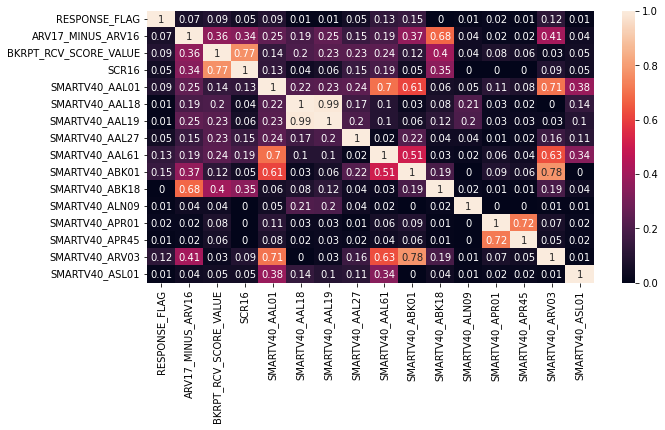

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(my_data_numeric_features.corr().abs().round(2), annot =True)

In [ ]:
cor_matrix = my_data_numeric_features.corr().abs()


In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)] 
print(to_drop)

['SCR16', 'SMARTV40_AAL19', 'SMARTV40_AAL61', 'SMARTV40_ABK01', 'SMARTV40_ABK18', 'SMARTV40_APR45', 'SMARTV40_ARV03']


In [ ]:
my_data.shape

(27390, 20)

In [ ]:
my_data.drop(columns=['SCR16', 'SMARTV40_AAL19', 'SMARTV40_AAL61', 'SMARTV40_ABK01', 'SMARTV40_ABK18', 'SMARTV40_APR45', 'SMARTV40_ARV03'])


,RESPONSE_FLAG,ARV17_MINUS_ARV16,BKRPT_RCV_SCORE_VALUE,DEM03,DEM06,DEM08,SMARTV40_AAL01,SMARTV40_AAL18,SMARTV40_AAL27,SMARTV40_ALN09,SMARTV40_APR01,SMARTV40_ASL01,STATE_CD
0,0,11108,473,F,Y,D,18,236569,51,0,0,0,CA
1,0,182,213,M,Y,C,10,34497,29,1623,0,0,TX
2,1,5342,494,M,U,H,8,31874,31,0,0,0,NY
3,1,85,1,M,N,E,26,124274,188,2000,0,2,IN
4,1,2245,109,F,U,H,32,97048,48,2220,0,0,MO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27385,0,5410,563,F,Y,I,27,299321,107,0,0,0,VA
27386,0,13385,595,M,U,G,29,164453,127,0,0,0,PA
27387,0,6236,154,U,Y,A,19,84161,31,0,0,9,MA
27388,1,57712,269,M,U,G,99,262906,78,0,0,0,TX


In [ ]:
my_data.RESPONSE_FLAG.value_counts(normalize=True)

0    0.833881
1    0.166119
Name: RESPONSE_FLAG, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


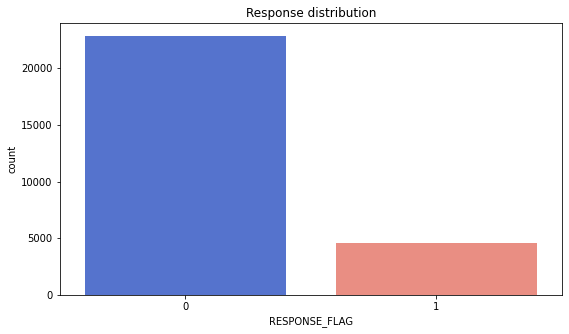

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(my_data.RESPONSE_FLAG, palette = ['royalblue','salmon'])
plt.title("Response distribution")
plt.show()

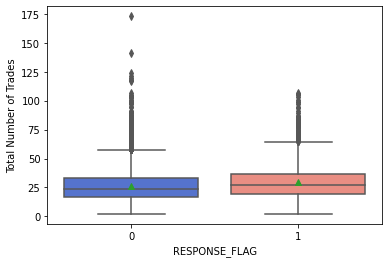

In [ ]:
sns.boxplot(data=my_data,y='SMARTV40_AAL01',x="RESPONSE_FLAG", showmeans=True,palette = ['royalblue','salmon'])
plt.ylabel('Total Number of Trades')
plt.show()

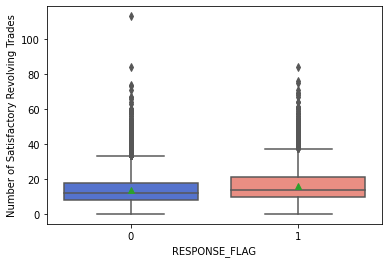

In [ ]:
sns.boxplot(data=my_data,y='SMARTV40_ARV03', x="RESPONSE_FLAG", showmeans=True,palette = ['royalblue','salmon'])
plt.ylabel('Number of Satisfactory Revolving Trades')
plt.show()

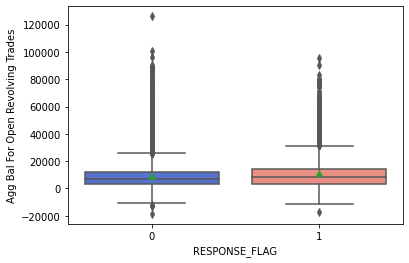

In [ ]:
sns.boxplot(data=my_data,y='ARV17_MINUS_ARV16', x="RESPONSE_FLAG", showmeans=True,palette = ['royalblue','salmon'])
plt.ylabel('Agg Bal For Open Revolving Trades')
plt.show()

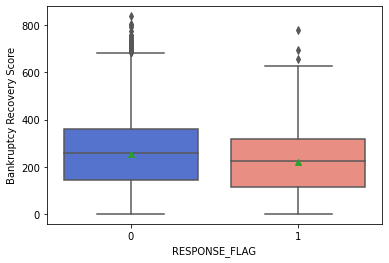

In [ ]:
sns.boxplot(data=my_data,y='BKRPT_RCV_SCORE_VALUE', x="RESPONSE_FLAG", showmeans=True,palette = ['royalblue','salmon'])
plt.ylabel('Bankruptcy Recovery Score')
plt.show()

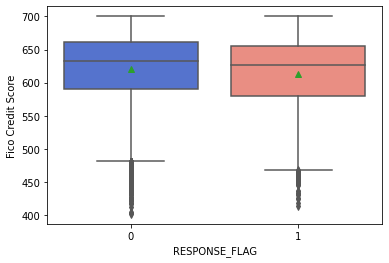

In [ ]:
sns.boxplot(data=my_data,y='SCR16', x="RESPONSE_FLAG", showmeans=True,palette = ['royalblue','salmon'])
plt.ylabel('Fico Credit Score')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


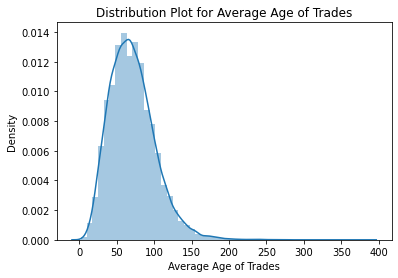

In [ ]:
sns.distplot(my_data["SMARTV40_AAL27"])
plt.title('Distribution Plot for Average Age of Trades')
plt.xlabel('Average Age of Trades')
plt.show()

In [ ]:
my_data.RESPONSE_FLAG.value_counts(normalize = True )*100

0    83.388098
1    16.611902
Name: RESPONSE_FLAG, dtype: float64

In [ ]:
RESPONSE_FLAG = pd.pivot_table(my_data, index = 'STATE_CD', values ="RESPONSE_FLAG", aggfunc = 'count')
RESPONSE_FLAG

,RESPONSE_FLAG
STATE_CD,
AK,69
AL,410
AR,240
AZ,804
CA,5255
DC,88
FL,3258
IN,566
KY,459


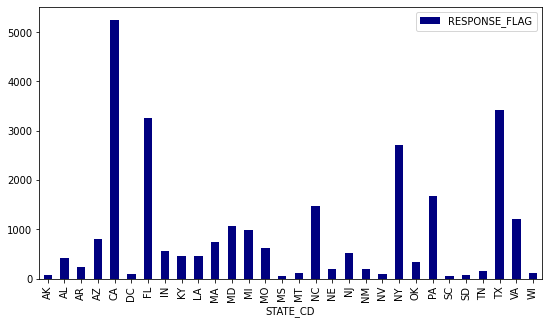

In [ ]:
RESPONSE_FLAG.plot.bar(color = 'navy', figsize=(9,5))
plt.show()

In [ ]:
Grouped_by_Flag_and_State = my_data.groupby(['STATE_CD', 'RESPONSE_FLAG']).agg({"RESPONSE_FLAG": 'count'}).fillna(0).rename(
    columns={'RESPONSE_FLAG':'COUNTED_FLAGS'}).reset_index()
Grouped_by_Flag_and_State = Grouped_by_Flag_and_State.append(
    {'STATE_CD': 'SC', 'RESPONSE_FLAG': 0,'COUNTED_FLAGS': 0},ignore_index=True)


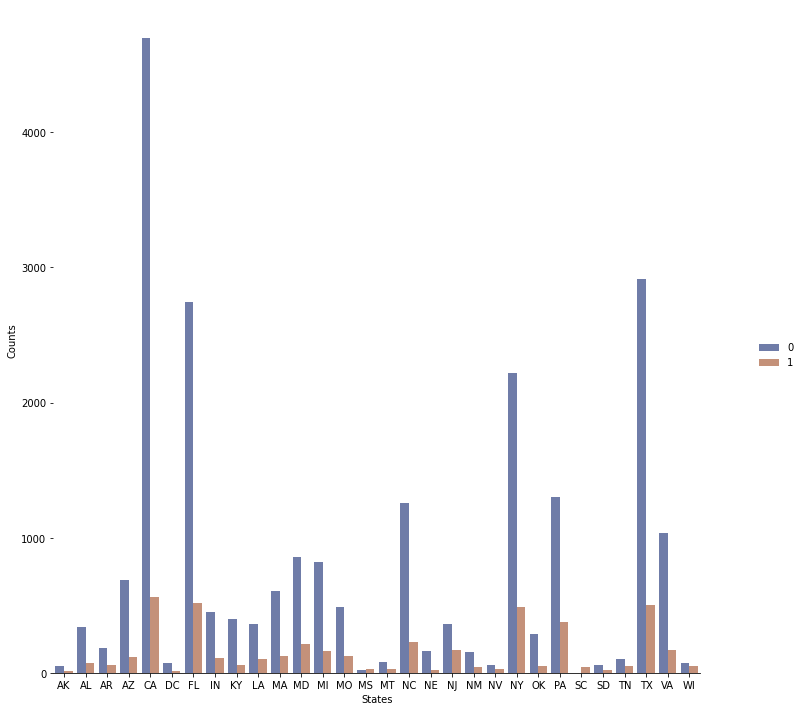

In [ ]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=Grouped_by_Flag_and_State, kind="bar",
    x="STATE_CD", y="COUNTED_FLAGS", hue="RESPONSE_FLAG",
    ci="sd", palette="dark", alpha=.6, height=10
)
g.despine(left=True)
g.set_axis_labels("States", "Counts")
g.legend.set_title("")

In [ ]:
my_data.head()

,RESPONSE_FLAG,ARV17_MINUS_ARV16,BKRPT_RCV_SCORE_VALUE,DEM03,DEM06,DEM08,SCR16,SMARTV40_AAL01,SMARTV40_AAL18,SMARTV40_AAL19,SMARTV40_AAL27,SMARTV40_AAL61,SMARTV40_ABK01,SMARTV40_ABK18,SMARTV40_ALN09,SMARTV40_APR01,SMARTV40_APR45,SMARTV40_ARV03,SMARTV40_ASL01,STATE_CD
0,0,11108,473,F,Y,D,645,18,236569,279902,51,6,7,66,0,0,0,7,0,CA
1,0,182,213,M,Y,C,665,10,34497,35823,29,6,5,99,1623,0,0,4,0,TX
2,1,5342,494,M,U,H,692,8,31874,65065,31,7,3,85,0,0,0,4,0,NY
3,1,85,1,M,N,E,512,26,124274,200134,188,10,4,100,2000,0,0,5,2,IN
4,1,2245,109,F,U,H,605,32,97048,114047,48,24,11,100,2220,0,0,23,0,MO


In [ ]:
my_data['STATE_CD'].value_counts()

CA    5255
TX    3417
FL    3258
NY    2708
PA    1671
NC    1482
VA    1206
MD    1070
MI     984
AZ     804
MA     732
MO     615
IN     566
NJ     528
LA     462
KY     459
AL     410
OK     342
AR     240
NM     191
NE     184
TN     152
WI     122
MT     108
NV      92
DC      88
SD      77
AK      69
MS      55
SC      43
Name: STATE_CD, dtype: int64

## MODEL BUILDING

### Logistic Regression

In [ ]:
X = my_data.drop('RESPONSE_FLAG', axis = 1)

In [ ]:
Y = my_data.RESPONSE_FLAG

In [ ]:
X = pd.get_dummies(X, drop_first = True)

In [ ]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,ARV17_MINUS_ARV16,BKRPT_RCV_SCORE_VALUE,SCR16,SMARTV40_AAL01,SMARTV40_AAL18,SMARTV40_AAL19,SMARTV40_AAL27,SMARTV40_AAL61,SMARTV40_ABK01,SMARTV40_ABK18,SMARTV40_ALN09,SMARTV40_APR01,SMARTV40_APR45,SMARTV40_ARV03,SMARTV40_ASL01,DEM03_F,DEM03_M,DEM03_U,DEM06_U,DEM06_Y,DEM08_B,DEM08_C,DEM08_D,DEM08_E,DEM08_F,DEM08_G,DEM08_H,DEM08_I,DEM08_J,DEM08_K,DEM08_L,DEM08_U,STATE_CD_AL,STATE_CD_AR,STATE_CD_AZ,STATE_CD_CA,STATE_CD_DC,STATE_CD_FL,STATE_CD_IN,STATE_CD_KY,STATE_CD_LA,STATE_CD_MA,STATE_CD_MD,STATE_CD_MI,STATE_CD_MO,STATE_CD_MS,STATE_CD_MT,STATE_CD_NC,STATE_CD_NE,STATE_CD_NJ,STATE_CD_NM,STATE_CD_NV,STATE_CD_NY,STATE_CD_OK,STATE_CD_PA,STATE_CD_SC,STATE_CD_SD,STATE_CD_TN,STATE_CD_TX,STATE_CD_VA,STATE_CD_WI
0,0.177018,1.481672,0.463160,-0.675167,0.345892,0.373645,-0.655372,-1.169963,-0.546415,-1.432764,-0.203901,-0.156306,-0.128537,-0.885807,-0.420691,1.089015,-0.997958,-0.212557,-0.898512,1.203667,-0.211052,-0.236514,2.881609,-0.500970,-0.462589,-0.364548,-0.312723,-0.230604,-0.193852,-0.19567,-0.215356,-0.034731,-0.123274,-0.09402,-0.173901,2.052359,-0.056773,-0.367434,-0.145260,-0.130551,-0.130984,-0.165707,-0.201627,-0.19304,-0.151556,-0.044856,-0.062918,-0.23917,-0.082239,-0.1402,-0.083799,-0.058054,-0.331233,-0.112446,-0.254895,-0.039653,-0.053096,-0.074702,-0.377539,-0.214613,-0.066889
1,-0.954744,-0.250495,0.817264,-1.295174,-0.756719,-0.832492,-1.376408,-1.169963,-0.970546,1.037597,-0.160329,-0.156306,-0.128537,-1.255142,-0.420691,-0.918261,1.002047,-0.212557,-0.898512,1.203667,-0.211052,4.228077,-0.347028,-0.500970,-0.462589,-0.364548,-0.312723,-0.230604,-0.193852,-0.19567,-0.215356,-0.034731,-0.123274,-0.09402,-0.173901,-0.487244,-0.056773,-0.367434,-0.145260,-0.130551,-0.130984,-0.165707,-0.201627,-0.19304,-0.151556,-0.044856,-0.062918,-0.23917,-0.082239,-0.1402,-0.083799,-0.058054,-0.331233,-0.112446,-0.254895,-0.039653,-0.053096,-0.074702,2.648736,-0.214613,-0.066889
2,-0.420249,1.621578,1.295305,-1.450176,-0.771031,-0.687990,-1.310860,-1.015444,-1.394677,-0.010435,-0.203901,-0.156306,-0.128537,-1.255142,-0.420691,-0.918261,1.002047,-0.212557,1.112951,-0.830794,-0.211052,-0.236514,-0.347028,-0.500970,-0.462589,-0.364548,3.197719,-0.230604,-0.193852,-0.19567,-0.215356,-0.034731,-0.123274,-0.09402,-0.173901,-0.487244,-0.056773,-0.367434,-0.145260,-0.130551,-0.130984,-0.165707,-0.201627,-0.19304,-0.151556,-0.044856,-0.062918,-0.23917,-0.082239,-0.1402,-0.083799,-0.058054,3.019019,-0.112446,-0.254895,-0.039653,-0.053096,-0.074702,-0.377539,-0.214613,-0.066889
3,-0.964791,-1.662878,-1.891633,-0.055159,-0.266849,-0.020535,3.834720,-0.551886,-1.182612,1.112456,-0.150208,-0.156306,-0.128537,-1.132031,0.003867,-0.918261,1.002047,-0.212557,-0.898512,-0.830794,-0.211052,-0.236514,-0.347028,1.996129,-0.462589,-0.364548,-0.312723,-0.230604,-0.193852,-0.19567,-0.215356,-0.034731,-0.123274,-0.09402,-0.173901,-0.487244,-0.056773,-0.367434,6.884201,-0.130551,-0.130984,-0.165707,-0.201627,-0.19304,-0.151556,-0.044856,-0.062918,-0.23917,-0.082239,-0.1402,-0.083799,-0.058054,-0.331233,-0.112446,-0.254895,-0.039653,-0.053096,-0.074702,-0.377539,-0.214613,-0.066889
4,-0.741049,-0.943362,-0.245048,0.409847,-0.415408,-0.445942,-0.753695,1.611384,0.301847,1.112456,-0.144301,-0.156306,-0.128537,1.083982,-0.420691,1.089015,-0.997958,-0.212557,1.112951,-0.830794,-0.211052,-0.236514,-0.347028,-0.500970,-0.462589,-0.364548,3.197719,-0.230604,-0.193852,-0.19567,-0.215356,-0.034731,-0.123274,-0.09402,-0.173901,-0.487244,-0.056773,-0.367434,-0.145260,-0.130551,-0.130984,-0.165707,-0.201627,-0.19304,6.598226,-0.044856,-0.062918,-0.23917,-0.082239,-0.1402,-0.083799,-0.058054,-0.331233,-0.112446,-0.254895,-0.039653,-0.053096,-0.074702,-0.377539,-0.214613,-0.066889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27385,-0.413205,2.081268,0.994317,0.022342,0.68

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

In [ ]:
model = sm.add_constant(X_scaled)
model = Logit(Y_train, X_train)
results = model.fit()

         Current function value: 0.419709
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          RESPONSE_FLAG   No. Observations:                21912
Model:                          Logit   Df Residuals:                    21851
Method:                           MLE   Df Model:                           60
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                 0.06741
Time:                        16:45:14   Log-Likelihood:                -9196.7
converged:                      False   LL-Null:                       -9861.4
Covariance Type:            nonrobust   LLR p-value:                1.710e-238
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ARV17_MINUS_ARV16         0.1875      0.027      6.821      0.000       0.134       0.241
BKRPT_RCV_SCORE_VALUE    -0.2537      0.035     -7.302      0.000      -0.322      -0.186
SCR16                     0.1004      0.032      3.146      0.002       0.038       0.163
SMARTV40_AAL01           -0.0328      0.036     -0.903      0.366      -0.104       0.038
SMARTV40_AAL18           -0.0623      0.119     -0.525      0.600      -0.295       0.170
SMARTV40_AAL19            0.1272      0.120      1.065      0.287      -0.107       0.361
SMARTV40_AAL27           -0.2284      0.024     -9.550      0.000      -0.275      -0.182
SMARTV40_AAL61            0.1532      0.029      5.274      0.000       0.096       0.210
SMARTV40_ABK01            0.3243      0.031     10.611      0.000       0.264       0.384
SMARTV40_ABK18            0.1471      0.027      5.454      0.000       0.094       0.200
SMARTV40_ALN09            0.0084      0.019      0.436      0.663      -0.029       0.046
SMARTV40_APR01            0.0118      0.025      0.478      0.632      -0.037       0.060
SMARTV40_APR45            0.0049      0.026      0.189      0.850      -0.046       0.055
SMARTV40_ARV03           -0.0919      0.040     -2.306      0.021      -0.170      -0.014
SMARTV40_ASL01           -0.0664      0.025     -2.618      0.009      -0.116      -0.017
DEM03_F                   9.6845   9756.427      0.001      0.999   -1.91e+04    1.91e+04
DEM03_M                   9.8258   9791.900      0.001      0.999   -1.92e+04    1.92e+04
DEM03_U                   3.9918   3982.741      0.001      0.999   -7802.037    7810.021
DEM06_U                  -0.0382      0.028     -1.353      0.176      -0.094       0.017
DEM06_Y                  -0.0705      0.029     -2.474      0.013      -0.126      -0.015
DEM08_B                  -0.0106      0.025     -0.418      0.676      -0.060       0.039
DEM08_C                  -0.0178      0.027     -0.665      0.506      -0.070       0.035
DEM08_D                   0.0075      0.032      0.234      0.815      -0.055       0.070
DEM08_E                  -0.0264      0.038     -0.688      0.491      -0.102       0.049
DEM08_F                  -0.0279      0.037     -0.752      0.452      -0.101       0.045
DEM08_G                  -0.0485      0.033     -1.456      0.145      -0.114       0.017
DEM08_H                  -0.0209      0.031     -0.681      0.496      -0.081       0.039
DEM08_I                  -0.0874      0.028     -3.092      0.002      -0.143      -0.032
DEM08_J                  -0.0290      0.025     -1.149      0.251      -0.079       0.020
DEM08_K                  -0.0101      0.025     -0.405      0.686      -0.059       0.039
DEM08_L                  -0.0033      0.026     -0.126      0.900      -0.054       0.048
DEM08_U                   0.0186      0.016      1.171      0.242      -0.013       0.050
STATE_CD_AL              -0.0870      0.042     -2.047      0.041      -0.170      -0.004
S

In [ ]:
logit=LogisticRegression(random_state=42)
logit.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [ ]:
Y_train_logit=logit.predict_proba(X_train)[:,1]
Y_test_logit=logit.predict_proba(X_test)[:,1]


In [ ]:
Y_train_pred=logit.predict(X_train)
Y_test_pred=logit.predict(X_test)

In [ ]:
print("ROC_AUC Train:",roc_auc_score(Y_train, Y_train_logit))
print("ROC_AUC Test:",roc_auc_score(Y_test, Y_test_logit))
print("Recall Train:",recall_score(Y_train, Y_train_pred))
print("Recall Test:",recall_score(Y_test, Y_test_pred))
print("Accuracy Train:",accuracy_score(Y_train, Y_train_pred))
print("Accuracy Test:",accuracy_score(Y_test, Y_test_pred))

ROC_AUC Train: 0.6781085443230699
ROC_AUC Test: 0.6809691281881521
Recall Train: 0.04060356652949246
Recall Test: 0.04751381215469613
Accuracy Train: 0.8353870025556772
Accuracy Test: 0.8386272362175977


In [ ]:
X_scaled.drop(['SMARTV40_AAL01','SMARTV40_AAL18', 'SMARTV40_AAL19', 'SMARTV40_ALN09', 'SMARTV40_APR01','SMARTV40_APR45', 'DEM03_F', 
               'DEM03_M', 'DEM03_U', 'DEM06_U', 'DEM08_B',
        'DEM08_C', 'DEM08_D', 'DEM08_E', 'DEM08_F', 'DEM08_G', 'DEM08_H', 'DEM08_J', 'DEM08_K','DEM08_L', 'DEM08_U', 'STATE_CD_AR', 
        'STATE_CD_MS', 'STATE_CD_DC', 'STATE_CD_IN', 'STATE_CD_LA', 'STATE_CD_MD', 'STATE_CD_MO', 'STATE_CD_MT', 'STATE_CD_NM',     
        'STATE_CD_NJ', 'STATE_CD_NV', 'STATE_CD_PA', 'STATE_CD_SC', 'STATE_CD_SD', 'STATE_CD_TN', 'STATE_CD_WI' ], axis=1, inplace=True)


In [ ]:
X_scaled.shape

(27390, 24)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

In [ ]:
model = sm.add_constant(X_scaled)
model = Logit(Y_train, X_train)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.677521
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          RESPONSE_FLAG   No. Observations:                21912
Model:                          Logit   Df Residuals:                    21888
Method:                           MLE   Df Model:                           23
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                 -0.5054
Time:                        16:45:15   Log-Likelihood:                -14846.
converged:                       True   LL-Null:                       -9861.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ARV17_MINUS_ARV16         0.1679      0.022      7.579      0.000       0.124       0.211
BKRPT_RCV_SCORE_VALUE    -0.1155      0.024     -4.900      0.000      -0.162      -0.069
SCR16                     0.0467      0.023      2.071      0.038       0.002       0.091
SMARTV40_AAL27           -0.1205      0.015     -7.863      0.000      -0.150      -0.090
SMARTV40_AAL61            0.0977      0.021      4.562      0.000       0.056       0.140
SMARTV40_ABK01            0.2206      0.024      9.308      0.000       0.174       0.267
SMARTV40_ABK18            0.1211      0.020      5.985      0.000       0.081       0.161
SMARTV40_ARV03           -0.0919      0.027     -3.406      0.001      -0.145      -0.039
SMARTV40_ASL01           -0.0512      0.016     -3.253      0.001      -0.082      -0.020
DEM06_Y                  -0.0289      0.014     -2.088      0.037      -0.056      -0.002
DEM08_I                  -0.0362      0.014     -2.623      0.009      -0.063      -0.009
STATE_CD_AL              -0.0309      0.014     -2.229      0.026      -0.058      -0.004
STATE_CD_AZ              -0.0696      0.014     -4.847      0.000      -0.098      -0.041
STATE_CD_CA              -0.2093      0.017    -12.302      0.000      -0.243      -0.176
STATE_CD_FL              -0.1201      0.016     -7.494      0.000      -0.152      -0.089
STATE_CD_KY              -0.0491      0.014     -3.479      0.001      -0.077      -0.021
STATE_CD_MA              -0.0388      0.014     -2.723      0.006      -0.067      -0.011
STATE_CD_MI              -0.0500      0.015     -3.419      0.001      -0.079      -0.021
STATE_CD_NC              -0.0788      0.015     -5.283      0.000      -0.108      -0.050
STATE_CD_NE              -0.0457      0.014     -3.307      0.001      -0.073      -0.019
STATE_CD_NY              -0.0881      0.016     -5.610      0.000      -0.119      -0.057
STATE_CD_OK              -0.0418      0.014     -3.022      0.003      -0.069      -0.015
STATE_CD_TX              -0.1192      0.016     -7.412      0.000      -0.151      -0.088
STATE_CD_VA              -0.0685      0.015     -4.664      0.000      -0.097      -0.040
=========================================================================================
"""

In [ ]:
logit=LogisticRegression(random_state=42)
logit.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [ ]:
Y_train_logit=logit.predict_proba(X_train)[:,1]
Y_test_logit=logit.predict_proba(X_test)[:,1]

Y_train_pred=logit.predict(X_train)
Y_test_pred=logit.predict(X_test)

In [ ]:
print("ROC_AUC Train:",roc_auc_score(Y_train, Y_train_logit))
print("ROC_AUC Test:",roc_auc_score(Y_test, Y_test_logit))
print("Recall Train:",recall_score(Y_train, Y_train_pred))
print("Recall Test:",recall_score(Y_test, Y_test_pred))
print("Accuracy Train:",accuracy_score(Y_train, Y_train_pred))
print("Accuracy Test:",accuracy_score(Y_test, Y_test_pred))

ROC_AUC Train: 0.6694362836039083
ROC_AUC Test: 0.6771472720616928
Recall Train: 0.023045267489711935
Recall Test: 0.022099447513812154
Accuracy Train: 0.8339266155531215
Accuracy Test: 0.8355239138371668


In [ ]:
param_logit={
    'class_weight':[None,'balanced'],
    'C': np.linspace(0.001, 0.1,10),
    'tol':np.linspace(0.0001, 0.1,10)
}

In [ ]:
gs_logit = GridSearchCV(
    estimator=LogisticRegression(random_state=42), 
    param_grid=param_logit,
    scoring="roc_auc", 
    cv=5).fit(X_train,Y_train)

In [ ]:
best_params_logit = gs_logit.best_params_
best_params_logit

{'C': 0.08900000000000001, 'class_weight': 'balanced', 'tol': 0.1}

In [ ]:
best_model_grid = LogisticRegression(
    C=best_params_logit['C'], 
    class_weight=best_params_logit['class_weight'],
    tol=best_params_logit['tol'],
    random_state=42).fit(X_train,Y_train)

In [ ]:
Y_train_logit_best=best_model_grid.predict_proba(X_train)[:,1]
Y_test_logit_best=best_model_grid.predict_proba(X_test)[:,1]

Y_train_pred_best=best_model_grid.predict(X_train)
Y_test_pred_best=best_model_grid.predict(X_test)

In [ ]:
print("ROC_AUC Train:",roc_auc_score(Y_train, Y_train_logit_best))
print("ROC_AUC Test:",roc_auc_score(Y_test, Y_test_logit_best))
print("Recall Train:",recall_score(Y_train, Y_train_pred_best))
print("Recall Test:",recall_score(Y_test, Y_test_pred_best))
print("Accuracy Train:",accuracy_score(Y_train, Y_train_pred_best))
print("Accuracy Test:",accuracy_score(Y_test, Y_test_pred_best))

ROC_AUC Train: 0.6706054521398523
ROC_AUC Test: 0.6785267357163655
Recall Train: 0.6013717421124829
Recall Test: 0.6331491712707182
Accuracy Train: 0.6343556042351223
Accuracy Test: 0.6294267981014969


In [ ]:
pred = best_model_grid.predict_proba(X_test)

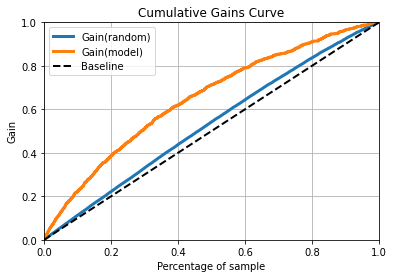

In [ ]:
skplt.metrics.plot_cumulative_gain(Y_test, pred)
plt.legend(["Gain(random)", "Gain(model)", "Baseline"])
plt.show()

<Figure size 504x504 with 0 Axes>

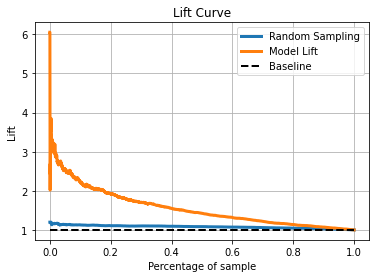

In [ ]:
plt.figure(figsize=(7,7))
skplt.metrics.plot_lift_curve(Y_test, pred)
plt.legend(["Random Sampling", "Model Lift", "Baseline"])
plt.show()



### Decision Tree for Feature Importance

In [ ]:
param_dt = {"max_depth":range(2,5),"min_samples_leaf":range(10,100,10),"class_weight":["balanced", None]}


In [ ]:
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_dt, scoring="roc_auc", cv=5, 
                   n_jobs=-1)
gs_dt.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': range(2, 5),
                         'min_samples_leaf': range(10, 100, 10)},
             scoring='roc_auc')

In [ ]:
best_params = gs_dt.best_params_
print(best_params)

{'class_weight': 'balanced', 'max_depth': 4, 'min_samples_leaf': 60}


In [ ]:
best_dt = DecisionTreeClassifier(random_state=42, class_weight=best_params['class_weight'], 
                               max_depth=best_params['max_depth'], 
                               min_samples_leaf=best_params['min_samples_leaf']).fit(X_train,Y_train)


In [ ]:
Y_train_dt_grid = best_dt.predict_proba(X_train)[:,1]
Y_test_dt_grid = best_dt.predict_proba(X_test)[:,1]

Y_train_pred_best = best_dt.predict(X_train)
Y_test_pred_best = best_dt.predict(X_test)

In [ ]:
feat_imp = pd.DataFrame(best_dt.feature_importances_, index = X_scaled.columns, columns=["Feature_imp"])
feat_imp = feat_imp.sort_values(by="Feature_imp", ascending = False)
feat_imp.head(10)

,Feature_imp
SMARTV40_ABK01,0.405186
BKRPT_RCV_SCORE_VALUE,0.207353
STATE_CD_CA,0.170298
ARV17_MINUS_ARV16,0.160841
SMARTV40_AAL27,0.030620
DEM08_I,0.025702
STATE_CD_KY,0.000000
STATE_CD_TX,0.000000
STATE_CD_OK,0.000000
STATE_CD_NY,0.000000


In [ ]:
X_scaled_best = X_scaled[['SMARTV40_ABK01', 'BKRPT_RCV_SCORE_VALUE', 'STATE_CD_CA', 'ARV17_MINUS_ARV16', 'SMARTV40_AAL27', 'DEM08_I']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_best, Y, test_size = 0.2, random_state = 42)

In [ ]:
param_logit={
    'class_weight':[None,'balanced'],
    'C': np.linspace(0.001, 0.1,10),
    'tol':np.linspace(0.0001, 0.1,10)
}

In [ ]:
gs_logit = GridSearchCV(
    estimator=LogisticRegression(random_state=42), 
    param_grid=param_logit,
    scoring="roc_auc", 
    cv=5).fit(X_train,Y_train)

In [ ]:
best_params_logit = gs_logit.best_params_
best_params_logit

{'C': 0.001, 'class_weight': None, 'tol': 0.1}

In [ ]:
best_model_grid = LogisticRegression(
    C=best_params_logit['C'], 
    class_weight=best_params_logit['class_weight'],
    tol=best_params_logit['tol'],
    random_state=42).fit(X_train,Y_train)

In [ ]:
Y_train_logit_best=best_model_grid.predict_proba(X_train)[:,1]
Y_test_logit_best=best_model_grid.predict_proba(X_test)[:,1]

Y_train_pred_best=best_model_grid.predict(X_train)
Y_test_pred_best=best_model_grid.predict(X_test)

In [ ]:
print("ROC_AUC Train:",roc_auc_score(Y_train, Y_train_logit_best))
print("ROC_AUC Test:",roc_auc_score(Y_test, Y_test_logit_best))
print("Recall Train:",recall_score(Y_train, Y_train_pred_best))
print("Recall Test:",recall_score(Y_test, Y_test_pred_best))
print("Accuracy Train:",accuracy_score(Y_train, Y_train_pred_best))
print("Accuracy Test:",accuracy_score(Y_test, Y_test_pred_best))

ROC_AUC Train: 0.6466316172927367
ROC_AUC Test: 0.6641857745377927
Recall Train: 0.003840877914951989
Recall Test: 0.004419889502762431
Accuracy Train: 0.8336071558963125
Accuracy Test: 0.835158817086528


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
clf=RandomForestClassifier(n_estimators=100, class_weight = 'balanced', max_depth= 4, min_samples_leaf= 60)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

In [ ]:
clf.fit(X_train,Y_train)


RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=60)

In [ ]:
feature_imp_rf = pd.Series(clf.feature_importances_, index=X_scaled.columns).sort_values(ascending=False)
feature_imp_rf

SMARTV40_ABK01           0.260258
BKRPT_RCV_SCORE_VALUE    0.139498
SMARTV40_AAL61           0.136592
SMARTV40_ARV03           0.113572
STATE_CD_CA              0.102072
ARV17_MINUS_ARV16        0.099395
SMARTV40_AAL27           0.051390
SCR16                    0.038222
SMARTV40_ABK18           0.024070
SMARTV40_ASL01           0.010843
DEM08_I                  0.006537
DEM06_Y                  0.003461
STATE_CD_TX              0.003391
STATE_CD_AZ              0.002977
STATE_CD_FL              0.002541
STATE_CD_VA              0.001559
STATE_CD_NE              0.001204
STATE_CD_NY              0.000692
STATE_CD_MA              0.000615
STATE_CD_NC              0.000479
STATE_CD_MI              0.000228
STATE_CD_AL              0.000215
STATE_CD_KY              0.000109
STATE_CD_OK              0.000081
dtype: float64

In [ ]:
Y_train_rf=clf.predict_proba(X_train)[:,1]
Y_test_rf=clf.predict_proba(X_test)[:,1]

Y_train_pred=clf.predict(X_train)
Y_test_pred=clf.predict(X_test)

In [ ]:
print("ROC_AUC Train:",roc_auc_score(Y_train, Y_train_logit))
print("ROC_AUC Test:",roc_auc_score(Y_test, Y_test_logit))
print("Recall Train:",recall_score(Y_train, Y_train_pred))
print("Recall Test:",recall_score(Y_test, Y_test_pred))
print("Accuracy Train:",accuracy_score(Y_train, Y_train_pred))
print("Accuracy Test:",accuracy_score(Y_test, Y_test_pred))

ROC_AUC Train: 0.6694362836039083
ROC_AUC Test: 0.6771472720616928
Recall Train: 0.5486968449931413
Recall Test: 0.5624309392265193
Accuracy Train: 0.6464037970062066
Accuracy Test: 0.6487769258853596
